# Принятие решений в бизнесе Интернет-магазина

## Описание проекта

Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки.



Задачи: Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Описание данных
- Данные для первой части

  Файл /datasets/hypothesis.csv. 
  - Hypothesis — краткое описание гипотезы;
  - Reach — охват пользователей по 10-балльной шкале;
  - Impact — влияние на пользователей по 10-балльной шкале;
  - Confidence — уверенность в гипотезе по 10-балльной шкале;
  - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка 
  гипотезы.
  
- Данные для второй части
  
  Файл /datasets/orders.csv.
  - transactionId — идентификатор заказа;
  - visitorId — идентификатор пользователя, совершившего заказ;
  - date — дата, когда был совершён заказ;
  - revenue — выручка заказа;
  - group — группа A/B-теста, в которую попал заказ.
  
  Файл /datasets/visitors.csv.
  - date — дата;
  - group — группа A/B-теста;
  - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

##  Загрузка данных и подготовка их к анализу

In [2]:
#импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#читаем файлы, сохраняем их в новых переменных
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')

In [4]:
#просматриваем файлы
display(hypothesis)
display(orders)
display(visitors)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [5]:
#переименовываем значения в столбцах
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True)


In [6]:
#меняем формат даты 
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

## Приоритезация гипотез

In [7]:
# просчитаем фреймворк ICE для приоритезации гипотез
hypothesis['ICE']=(hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективные гипотезы: №8, 0,7

In [8]:
# просчитаем фреймворк RICE для приоритезации гипотез
hypothesis['RICE']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Наиболее перспективные гипотезы согласно методике RICE: №7,2,0

### Выводы по приоритезации гипотез

Наиболее перспективные гипотезы согласно методике ICE: №8,0,7.
Наиболее перспективные гипотезы согласно методике RICE: №7,2,0.

На основании данных, наиболее перспективные гипотеза это 7 и 0. Данные гипотезы согласно двум методикам попали в первую тройку.

В то же время гипотеза 8, которая была на первом месте по методике ICE опустилась на 5 место по методике RICE, так как у нее низкий показатель Reach — количество  пользователей, которых затронет изменение.

У 7 гипотезы же данный показатель очень высокий.


## Анализ A/B-теста

In [9]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups=orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated=datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### График кумулятивной выручки по группам

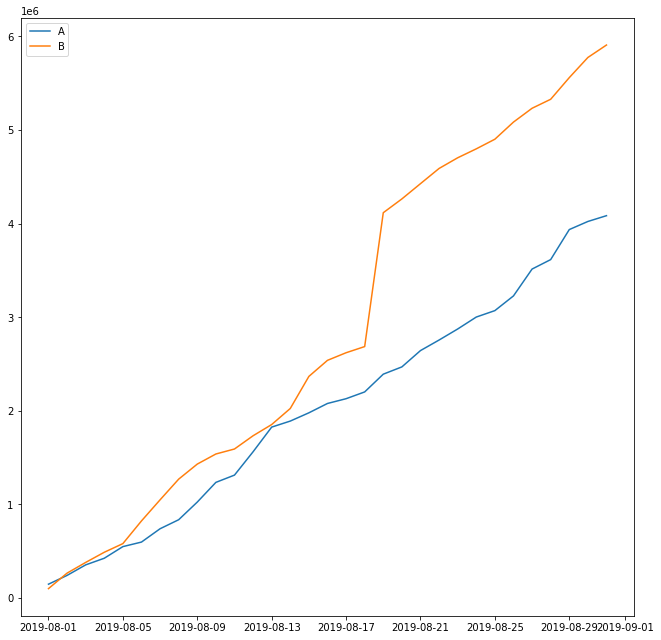

In [10]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(11, 11)) 
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 


#### Выводы по графикам кумултивной выручки по группам

Выручка почти увеличивается в течение всего теста. 
ОДнако выручка по группе А увеличивается равномерно. В группе B наблюдается резкий скачок. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам. 

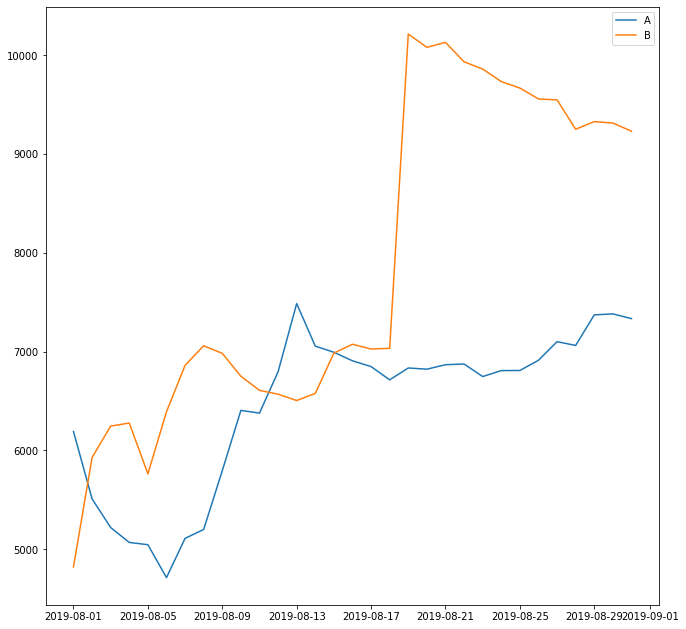

In [11]:
plt.figure(figsize=(11, 11)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

#### Выводы по графикам кумулятивного среднего чека по группам

Средний чек групп A и B в процессе растет, однако наблюдались резкие скачки вниз в начале. По группе B также наблюдается резкий скачок среднего чека, а затем постепенный спад.

### График относительного изменения кумулятивного среднего чека группы B к группе A

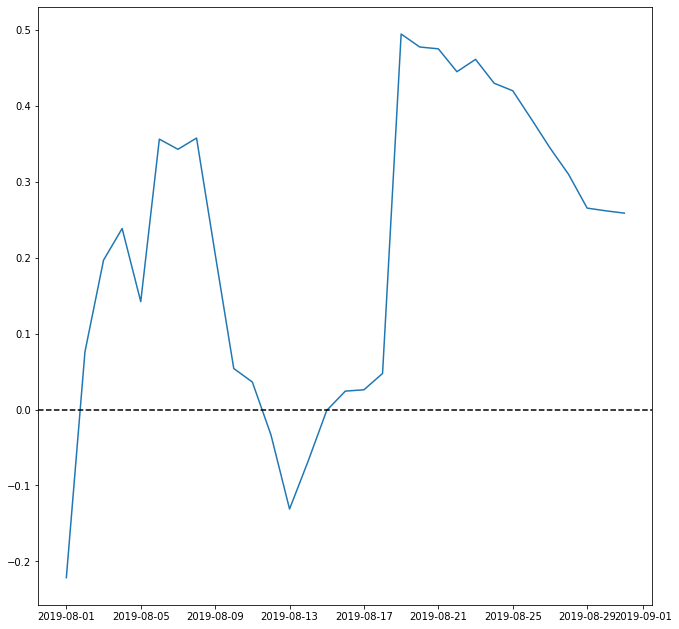

In [12]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

plt.figure(figsize=(11, 11)) 
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

В нескольких точках график различия между сегментами резко «скачет», скорее всего где-то спрятаны крупные заказы и выбросы

### График кумулятивной конверсии по группам 

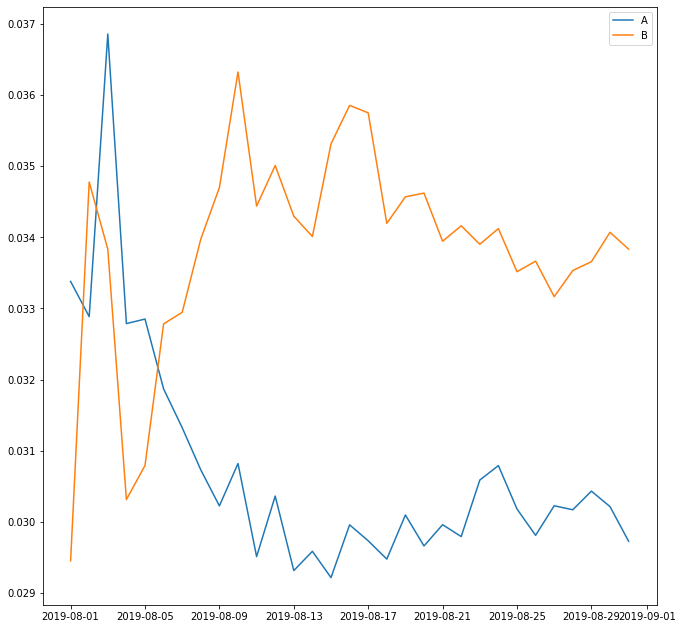

In [13]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(11, 11)) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
#plt.axis(["2019-08-01", '2019-09-01', 0, 0.4]) 

#### Выводы по графику кумулятивной конверсии по группам
У групп были резкие скачки вверх в начале, затем резкий провал. Однако затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### График относительного изменения кумулятивной конверсии группы B к группе A.

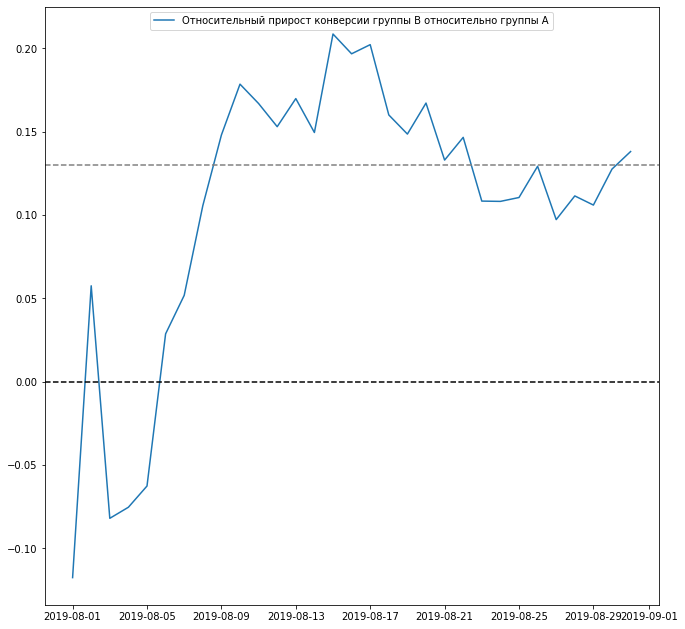

In [14]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(11, 11)) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend(loc='upper center')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')


#### Вывод по графику относительного изменения кумулятивной конверсии группы В к группе А.

В начале теста группа B значительно проигрывала группе A, затем резко вырвалась вперёд, и примерно выравнилась -график колеблется вокруг уровня 0.13.

### Точечный график количества заказов по пользователям

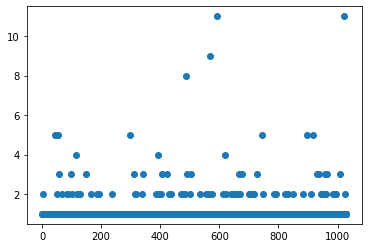

In [15]:
#Найдем число заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

#строим точечный график количества заказов по пользователям
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

Пользователей, заказавших более 2 раз, довольно мало

### Подсчет 95-й и 99-й перцентили количества заказов на пользователя

In [16]:
display(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

array([1., 2., 4.])

Не более 5% пользователей совершили более 2х заказов. И не более 1% пользователей сделали больше 4х заказов

### Точечный график стоимостей заказов

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


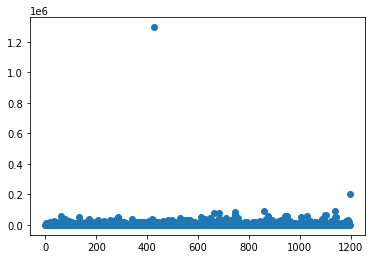

In [29]:
display(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
здеюн

Существуют  выбросы с покупками на 1,3 млн.рублей, а также на 202,7 тысяч рублей. В основном заказы меньше 100 тысяч рублей.

### Подсчет 95-й и 99-й перцентили стоимости заказов. 

In [18]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Не более чем у 5 % заказов чек выше 28 000 рублей, не более чем у 1 % заказа чек выше 59 000 рублей.

### Подсчет статистической значимости различий в конверсии между группами по «сырым» данным. 

Формируем данные, где :
   
   date — дата;
   
   ordersPerDateA — количество заказов в выбранную дату в группе A;
   
   revenuePerDateA — суммарная выручка в выбранную дату в группе A;
   
   ordersPerDateB — количество заказов в выбранную дату в группе B;
   
   revenuePerDateB — суммарная выручка в выбранную дату в группе B;
   
   ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
   
   revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
   
   ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
   
   revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
   
   visitorsPerDateA — количество пользователей в выбранную дату в группе A;
   
   visitorsPerDateB — количество пользователей в выбранную дату в группе B;
   
   visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
   
   visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [19]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


<b>Формируем нулевую гипотезу:</b> Статистически значимых различий в конверсии между группами нет.

<b>Альтернативная гипотеза:</b> Различия в конверсии между группами есть.

In [20]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

# Объявите переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
#А пользователям без заказов — нули.
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0,
                     index=np.arange(data['visitorsPerDateA'].sum() -
                     len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0,
                     index=np.arange(data['visitorsPerDateB'].sum() - 
                    len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05  # критический уровень статистической значимости
#Посчитаем статистическую значимость различия конверсии по тесту Манна-Уитни.

results= stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-значение: ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#Выведем относительный прирост конверсии группы B
print('относительный прирост:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
       'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.017
относительный прирост: 0.138
Отвергаем нулевую гипотезу: разница статистически значима


#### Вывод по расчету статистической значимости различий в конверсии между группами по «сырым» данным. 
p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

<b>Нулевая гипотеза:</b> различий в среднем чеке между группами нет. 

<b>Альтернативная гипотеза:</b> различия в среднем чеке между группами есть.

In [21]:
alpha = 0.05  # критический уровень статистической значимости
results_order= stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-значение: ', results_order)

print('относительный прирост:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

if results_order < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
       'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.7292909855432458
относительный прирост: 0.259
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

### Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным. 

95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.
Примим за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 58 000 рублей. Так мы уберёте 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [22]:
# Отберем пользователей с числом заказов больше 4  
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id'],
    ],
    axis=0,
)
 #Отберем пользователей, совершивших заказы дороже 58000
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitor_id']

#Объединим вышеуказанных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

In [23]:
# Создаем переменные, в которых сохранены очищенные данные о заказах,  не включая аномальных пользователей.
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [24]:
#Считаем статистическую значимость различия конверсии после удаления аномальных пользователей.
alpha = 0.05  # критический уровень статистической значимости
#Посчитаем статистическую значимость различия конверсии по тесту Манна-Уитни.

raw_results= stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-значение: ', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

if raw_results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
       'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  0.01438
Отвергаем нулевую гипотезу: разница статистически значима


#### Вывод по подсчету статистической значимости различий в конверсии между группами по «очищенным» данным. 
p-value = 0.01438 меньше 0.05. Не сильно отличается от значения с сырыми данными (0.017) Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [25]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


0.851


P-value увеличился,  общие выводы по результатам теста не изменились.

### Вывод по A/B тесту

- Существует статистически значимое различие по конверсии между группами  по «сырым» и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Тест следует остановить, фиксируем победу группы B, так как график различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A.

## Вывод

- Проанализировав перечень имеющих гипотез согласно методикам ICE и RICE наиболее перспективными были выбраны гипотезы №7 и №0.
Данные гипотезы согласно двум методикам попали в первую тройку.

- Проведя A/B тест по имеющим данным, были сделаны следующие выводы: 
    -  Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
    -  По сырым и "очищенным"данным нет статистически значимого различия по среднему чеку между группами. 
    -  График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту. Хотя в нчале и был резкий скачок вниз.
    - График различия среднего чека колеблется: выявлены аномалии. 
    

Исходя из выводов: тест следует остановить, фиксируем победу группы B, так как график различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A.

